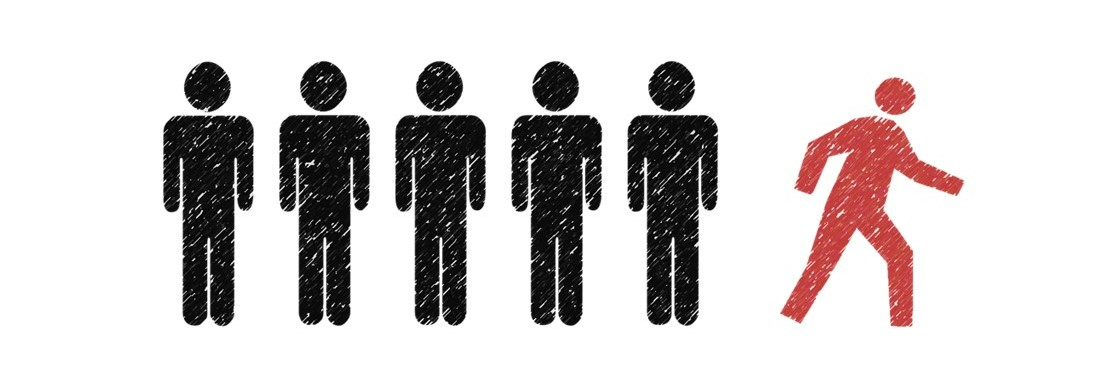


#**Analyzing customer churn in the telecomunication industry**

By: Shehneela Arshi

*Customer churn* is one of the most vital data points for any businesses to track. After all, retaining customers is the way most companies succeed, and nearly all marketing and customer service initiatives are focused on fixing or improving the customer experience. Customer churn analysis helps in identifying key stages in the customer journey where customers tend to fall off, allowing to pinpoint specific strategies to improve their interactions with the brand and improve brand loyalty.

What Is Customer Churn?
Customer churn is the rate at which customers leave your company. This could be for a variety of reasons, such as switching to a competitor, canceling their subscription due to poor customer service, stopping all contact with a brand because of too few touchpoints, etc. 

Customer churn analysis is important for obvious reasons: lost customers mean a direct loss of revenue.

Why is reducing churn essential?

You might think that you can just make up for lost customers by appealing to new ones, but *studies have shown* that the **CAC (customer acquisition cost)** for gaining a new customer can be anywhere from **five to 25 times** more expensive **than keeping an existing customer.**

*Ref: https://hbr.org/2014/10/the-value-of-keeping-the-right-customers*

****Problem Statement –****

Analyze the data to identify the reasons contributing towards the overall customer churn rate of 26.5%. Provide conclucions and recommendations to the management on how to control customer attrition.

****Industry: Telecom****

Data Description:

Source of the data: https://www.kaggle.com/blastchar/telco-customer-churn 

We are using 2 different datasets, the first dataset contains 7043 rows (customers) and 21 columns (features).

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

1. Customers who left within the last month – the column is called Churn
2. Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
3. Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
4. Demographic info about customers – gender, age range, and if they have partners and dependents

The second dataset contains 7043 rows (customers) and 11 columns (features) and includes information about the customers, including the Customer ID which we will use as primary key for joining the datasets for our analysis:

1. Customers' status - whether they stayed or churned or just joined the company – the column is called Churn Status
2. Satisfaction scores for the service given by the customers
3. Why the customers churned - this column is called Churn Reason
4. Churn Category - whether the churn was due to competitor, price, service issues, attitude of the customer service staff etc.

Some columns from both datasets will not be used for our analysis and will be deleted during data wrangling.

As we do not have the exact dates and months when the customers joined the company or when they subscribed to any of the services neither do we know when they actually left, we are only told it was in the past month, therefore, we will use the following formula to calculate churn for the purpose of our analysis.

Formula:

**Churn rate = No of customers churned / Total number of customers**





###**Contents:**
I. Load the Data
  - Import Modules
  - Set palette color and style for visualizations
  - Mount G-Drive & Import the Datasets
  
II. Data Wrangling
  - Join the 2 datasets with CustomerID as the primary key
  - Deleting Columns that will not be used
  - Missing Values
  - Display values and counts of the columns

      - a. Findings
  - Convert datatypes

III. Data Overview
  - Calculate Churn Rate
  - Bird's eye view of the merged dataset
  - Segmentation by customer lifecycle to identify the customer segment with the highest churn rate
  - Descriptive Statistics

IV. Exploratory Data Analysis & Data Preparation
  - Visulaization of categorical data on the basis of churn

     -  a. Findings
  - Chart the distribution of Monthly charges, Total charges and Tenure for customers that stayed compared to customers that churned

     -  a. Prepare the data for analysis and testing

     -  b. Findings

  - Analyze categorical data and compare how values within each category measure up against the 26.5% overall churn rate of the company
     -  a. Prepare the data for analysis and testing

     - b. Split the dataframes into numerical and categorical based on their datatypes

     - c. Analyze and visualize the data

     - d. Findings

  - Analyze the impact of satisfaction score on churn
  - Analyze the satisfaction score of the customers that churned based on churn category
    - a. Treemap of churn categores
  - Analyze the satisfaction score of the customers that churned and the reasons for churning
    

V. Hypotheses Testing
 
  - two sample t-tests
    - First t-test
     - a. Hypothesis
     - b. Run the two sample t-test
     - c. Results
     - d. Visualization
    - Second t-test
     - a. Hypothesis
     - b. Run the two sample t-test
     - c. Results
     - d. Visualization
    
  - z-tests
    - First z-test
     - a. Hypothesis
     - b. Run the z-test
     - c. Results
     - d. Visualization
    - Second z-test
     - a. Hypothesis
     - b. Run the z-test
     - c. Results
     - d. Visualization
    
VI. Summary

VII. Final Conclusion & Recommendations

  


# Import Modules

In [ ]:
# import & alias modules
import math 
import pandas as pd
from scipy import stats
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
!pip install squarify
import squarify 
sns.set()

# Set the palette color and style for the visualizations


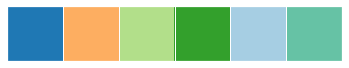

In [ ]:
flatui = ["#1f78b4",  "#fdae61", "#b2df8a", "#33a02c", "#a6cee3", "#66c2a5"]
#flatui = ["#a6cee3", "#1f78b4", "#b2df8a", "#33a02c"] #d53e4f

sns.set_palette(flatui)
sns.palplot(sns.color_palette())
sns.set_style("white")

## Mount G-Drive & Import the Datasets

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#read datasets from the google drive
cstatus_df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Colab DATASETS/ChurnStatus.csv')
cstatus_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customerID          7043 non-null   object
 1   Count               7043 non-null   int64 
 2   Quarter             7043 non-null   object
 3   Satisfaction Score  7043 non-null   int64 
 4   Customer Status     7043 non-null   object
 5   Churn Label         7043 non-null   object
 6   Churn Value         7043 non-null   int64 
 7   Churn Score         7043 non-null   int64 
 8   CLTV                7043 non-null   int64 
 9   Churn Category      1869 non-null   object
 10  Churn Reason        1869 non-null   object
dtypes: int64(5), object(6)
memory usage: 605.4+ KB


In [ ]:
telco_df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Colab DATASETS/Telco.csv')
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#Data Wrangling

##Join the 2 datasets with CustomerID as the primary key

In [ ]:
telcochurn_df = telco_df.merge(cstatus_df,on=["customerID"])
telcochurn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customerID          7043 non-null   object 
 1   gender              7043 non-null   object 
 2   SeniorCitizen       7043 non-null   int64  
 3   Partner             7043 non-null   object 
 4   Dependents          7043 non-null   object 
 5   tenure              7043 non-null   int64  
 6   PhoneService        7043 non-null   object 
 7   MultipleLines       7043 non-null   object 
 8   InternetService     7043 non-null   object 
 9   OnlineSecurity      7043 non-null   object 
 10  OnlineBackup        7043 non-null   object 
 11  DeviceProtection    7043 non-null   object 
 12  TechSupport         7043 non-null   object 
 13  StreamingTV         7043 non-null   object 
 14  StreamingMovies     7043 non-null   object 
 15  Contract            7043 non-null   object 
 16  Paperl

##Deleting Columns that will not be used at any point during the analysis
There are a number of columns that we are not required for the purpose of our analysis and can be deleted.

In [ ]:
#deleting the columns
telcochurn_df.drop(['customerID','Churn Label','Churn Score', 'CLTV', 'Quarter'], inplace=True, axis=1)

In [ ]:
# checking that the columns have been deleted
telcochurn_df.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Count,Satisfaction Score,Customer Status,Churn Value,Churn Category,Churn Reason
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1,3,Joined,0,NaN,NaN


##Check for missing values or NaNs

In [ ]:
telcochurn_df.isnull().sum()

gender                   0
SeniorCitizen            0
Partner                  0
Dependents               0
tenure                   0
PhoneService             0
MultipleLines            0
InternetService          0
OnlineSecurity           0
OnlineBackup             0
DeviceProtection         0
TechSupport              0
StreamingTV              0
StreamingMovies          0
Contract                 0
PaperlessBilling         0
PaymentMethod            0
MonthlyCharges           0
TotalCharges             0
Churn                    0
Count                    0
Satisfaction Score       0
Customer Status          0
Churn Value              0
Churn Category        5174
Churn Reason          5174
dtype: int64

No nulls are reported under Total Charges but as the column datatype is assigned string we need to investigate the reason. We will check if there are any empty spaces in column

In [ ]:
#assign the column total charges from the dataframe to check where the value of total charges is an empty space
check = telcochurn_df['TotalCharges'] == " "

In [ ]:
check.value_counts()

False    7032
True       11
Name: TotalCharges, dtype: int64

There are overall 11 empty values in Total Charges and 5174 nulls each in Churn Category and Churn Reason. 

The 11 missing values in Total Charges can be due to customers who have recently joined the company and have not yet been charged yet. To confirm this we need to check if the column Tenure has 11 records with 0 to correlate with the 11 missing values in Total Charges

In [ ]:
#Check if 11 records have 0 as tenure
telcochurn_df['tenure'].value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

Confirm if the 5174 null values in churn category and churn reason represent only those customers that have churned

In [ ]:
#create a crosstab to check if the churn value is Yes for all churn categories
pd.crosstab(telcochurn_df['Churn Category'],telcochurn_df['Churn']) 

Churn,Yes
Churn Category,
Attitude,314
Competitor,841
Dissatisfaction,303
Other,200
Price,211


In [ ]:
#create a crosstab to check if the churn value is Yes for all churn reasons
pd.crosstab(telcochurn_df['Churn Reason'],telcochurn_df['Churn']) 

Churn,Yes
Churn Reason,
Attitude of service provider,94
Attitude of support person,220
Competitor had better devices,313
Competitor made better offer,311
Competitor offered higher download speeds,100
Competitor offered more data,117
Deceased,6
Don't know,130
Extra data charges,39


## Display values and counts of the columns

In [ ]:
#Display values
for col in telcochurn_df.columns:
    print(telcochurn_df[col].value_counts())
    print()

Male      3555
Female    3488
Name: gender, dtype: int64

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

No     3641
Yes    3402
Name: Partner, dtype: int64

No     4933
Yes    2110
Name: Dependents, dtype: int64

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

Yes    6361
No      682
Name: PhoneService, dtype: int64

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

No 

In [ ]:
#display value and count for Senior Citizen
telcochurn_df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

###Findings:
After an exploration of the datatypes of the variables, it can be observed that Total Charges are displayed as an object and when we display the cells with empty values within the column we can see that there are *11 rows* where the value is *empty*. This could be the reason that the datatype is showing as a string value. We don't need to drop these rows as we already confirmed earlier that these are new customers and have not yet been charged.
We will though, need to convert the Total Charges datatype into a float.

We can also see that Senior Citizen is an int datatype with binary values.
For the purpose of our analysis we would need Senior Citizen to be both binary data type (to conduct the z-test) and categorical data type with values 'Yes' and 'No' for a deeper analysis. We will deal with this in the next steps.

The 5174 missing values in Churn Category and Churn Reason are representing the number of people that stayed and did not churn so we do not need to change or drop them.



In [ ]:
telcochurn_df.tenure.value_counts(normalize=True)

1     0.087037
72    0.051399
2     0.033792
3     0.028397
4     0.024989
        ...   
28    0.008093
39    0.007951
44    0.007241
36    0.007099
0     0.001562
Name: tenure, Length: 73, dtype: float64

##Convert datatypes

Convert Senior Citizen from binary to str type by converting "0" & "1" to "No" and "Yes"

In [ ]:
#Create a new column SenCitizen Values to store the binary values for Senior Citizen Column
telcochurn_df['SenCitizen Values'] = telcochurn_df['SeniorCitizen']

In [ ]:
#Check the values of the newly created column
telcochurn_df['SenCitizen Values'].value_counts()

0    5901
1    1142
Name: SenCitizen Values, dtype: int64

In [ ]:
# Convert the binary data with Senior Citizen to Yes and No
filter = lambda x: 'Yes' if x == 1 else 'No'
telcochurn_df['SeniorCitizen'] = telcochurn_df['SeniorCitizen'].apply(filter)

In [ ]:
#Check if the values have been converted
telcochurn_df['SeniorCitizen'].value_counts()

No     5901
Yes    1142
Name: SeniorCitizen, dtype: int64

Convert Total Charges column from object to float datatype

In [ ]:
#Converting datatype for Total Charges to float
telcochurn_df['TotalCharges'] = telcochurn_df['TotalCharges'].apply(pd.to_numeric, downcast='float', errors='coerce')

#Check if the datatype has been changed
telcochurn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              7043 non-null   object 
 1   SeniorCitizen       7043 non-null   object 
 2   Partner             7043 non-null   object 
 3   Dependents          7043 non-null   object 
 4   tenure              7043 non-null   int64  
 5   PhoneService        7043 non-null   object 
 6   MultipleLines       7043 non-null   object 
 7   InternetService     7043 non-null   object 
 8   OnlineSecurity      7043 non-null   object 
 9   OnlineBackup        7043 non-null   object 
 10  DeviceProtection    7043 non-null   object 
 11  TechSupport         7043 non-null   object 
 12  StreamingTV         7043 non-null   object 
 13  StreamingMovies     7043 non-null   object 
 14  Contract            7043 non-null   object 
 15  PaperlessBilling    7043 non-null   object 
 16  Paymen

#Data Overview

##Calculate Churn Rate

In [ ]:
churn_y = telcochurn_df['Churn'].value_counts()['Yes']
churn_n = telcochurn_df['Churn'].value_counts()['No']

churn_rate = churn_y/(churn_y + churn_n)*100
churn_rate

26.536987079369588

##Bird's eye view of the dataset

In [ ]:
total_customers = len(telcochurn_df.index)
print('The dataset comprises of %s total customers, %s of which churned.' %(total_customers, telcochurn_df[telcochurn_df['Churn'] == "Yes"].shape[0]))
churnNB = telcochurn_df['Churn'].value_counts()[1]
churnrate = float(churnNB) / total_customers
print('The overall churn rate therefore is {:.1f}%'.format(churnrate*100))

The dataset comprises of 7043 total customers, 1869 of which churned.
The overall churn rate therefore is 26.5%


## Segmentation by customer lifecycle to identify the customer segment with the highest churn rate
To get a deeper understanding of the customers that churned, we need to see which segment of the customers that churned.
Customers can be segmented based on the tenure, where customers that have been with company for 0-3 months are termed as 'New'; 3-12 are segmented as 'growing'; 12-24 are 'Mature' and all beyong 24 months fall under 'Declining'.

Segmentation by customer lifecycle is a simple concept that groups customers by their tenure. 
Customers are new and growing, then mature and finally declining and churning. The mature and 
declining groups can be stable for a very long time (sometimes, 5 years or even more)

In [ ]:
#Grouping and perform count over each group of tenure
churn_yes = telcochurn_df[telcochurn_df['Churn'] == 'Yes'] 
group_tenure =  churn_yes.groupby('tenure')['tenure'].count()

# display number of customers that churned grouped by tenure in ascending order monthwise
group_tenure.head(15)

tenure
1     380
2     123
3      94
4      83
5      64
6      40
7      51
8      42
9      46
10     45
11     31
12     38
13     38
14     24
15     37
Name: tenure, dtype: int64

It is interesting to note that 380 of the customers that churned had only been with the company for a month. We can dig deeper and calculate the percentage of customers that had been with the company from 1-6 months before they churned

In [ ]:
#Grouping and perform count over each group of tenure
group_tenure =  churn_yes.groupby('tenure')['tenure'].count()
group_tenure.head(6) # displays number of customers that churned grouped by tenure
count_tenure6 = churn_yes[churn_yes['tenure']< 7]
ct6 = count_tenure6['tenure'].count()
count_tenure1 = churn_yes[churn_yes['tenure']< 2]
ct1 =count_tenure1['tenure'].count()

In [ ]:
# Calculating the % of the customers that churned which had been with the company for 6 months or less
cm6=float(ct6)/churnNB
cm1=float(ct1)/churnNB
print('%s customers out of a total of %s that churned, had been with the company for 6 months or less,' %(ct6, telcochurn_df[telcochurn_df['Churn'] == "Yes"].shape[0]))
print('accounting for {:.1f}% of the total customers that churned.'.format(cm6*100))
print('While {:.1f}% of the churned, had only been with the company for 1 month, showing that the company is having problems converting newly acquired customers (0-3 months) into loyal ones.'.format(cm1*100))


784 customers out of a total of 1869 that churned, had been with the company for 6 months or less,
accounting for 41.9% of the total customers that churned.
While 20.3% of the churned, had only been with the company for 1 month, showing that the company is having problems converting newly acquired customers (0-3 months) into loyal ones.


##Descriptive Statistics on the numeric columns

In [ ]:
telcochurn_df.describe() # see the descriptive statistics

,tenure,MonthlyCharges,TotalCharges,Count,Satisfaction Score,Churn Value,SenCitizen Values
count,7043.000000,7043.000000,7032.000000,7043.0,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2283.300441,1.0,3.244924,0.265370,0.162147
std,24.559481,30.090047,2266.771363,0.0,1.201657,0.441561,0.368612
min,0.000000,18.250000,18.799999,1.0,1.000000,0.000000,0.000000
25%,9.000000,35.500000,401.449997,1.0,3.000000,0.000000,0.000000
50%,29.000000,70.350000,1397.475037,1.0,3.000000,0.000000,0.000000
75%,55.000000,89.850000,3794.737488,1.0,4.000000,1.000000,0.000000
max,72.000000,118.750000,8684.799805,1.0,5.000000,1.000000,1.000000


#Exploratory Data Analysis

##Visulaization of categorical dataset on the basis of churn

This would allow us to clearly see how the customers churned based on the customer demographics, services, payemnt methods while also highlighting the customer satisfaction score and reasons they churned

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


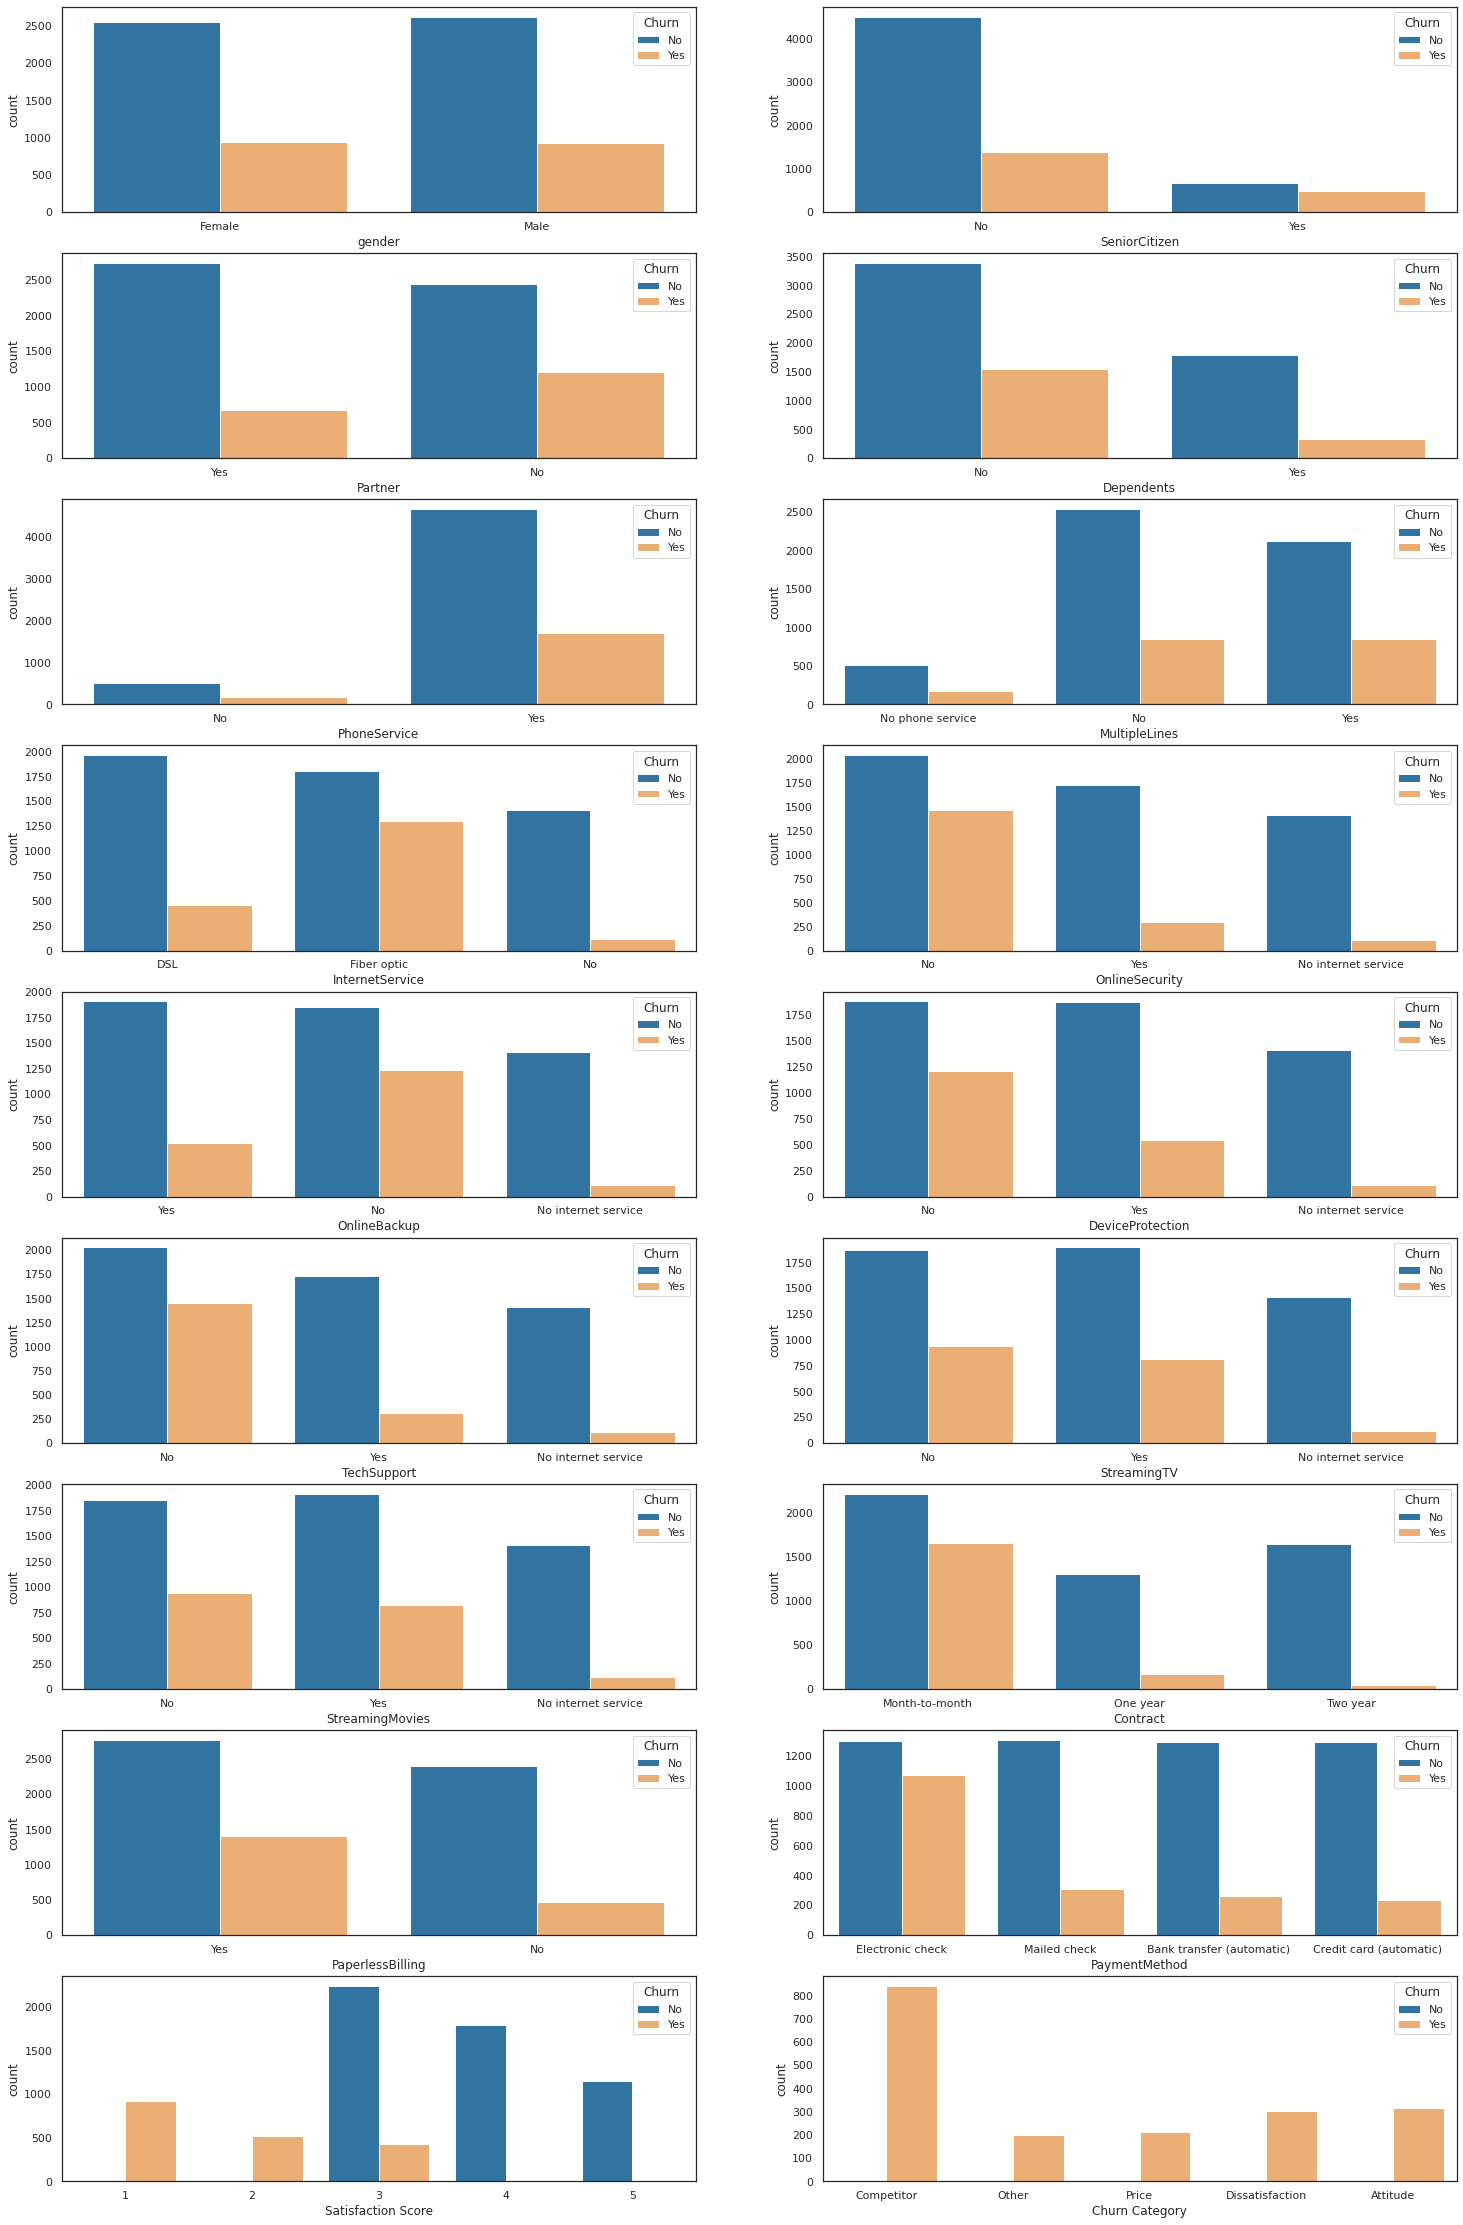

In [ ]:
plt.figure(figsize=(25, 40))

plt.subplot(921)
sns.countplot(x=telcochurn_df['gender'], hue=telcochurn_df['Churn']);

plt.subplot(922)
sns.countplot(x=telcochurn_df['SeniorCitizen'], hue=telcochurn_df['Churn']);

plt.subplot(923)
sns.countplot(x=telcochurn_df['Partner'], hue=telcochurn_df['Churn']);

plt.subplot(924)
sns.countplot(x=telcochurn_df['Dependents'], hue=telcochurn_df['Churn']);

plt.subplot(925)
sns.countplot(x=telcochurn_df['PhoneService'], hue=telcochurn_df['Churn']);

plt.subplot(926)
sns.countplot(x=telcochurn_df['MultipleLines'], hue=telcochurn_df['Churn']);

plt.subplot(927)
sns.countplot(x=telcochurn_df['InternetService'], hue=telcochurn_df['Churn']);

plt.subplot(928)
sns.countplot(x=telcochurn_df['OnlineSecurity'], hue=telcochurn_df['Churn']);

plt.subplot(929)
sns.countplot(x=telcochurn_df['OnlineBackup'], hue=telcochurn_df['Churn']);

plt.subplot(9, 2, 10)
sns.countplot(x=telcochurn_df['DeviceProtection'], hue=telcochurn_df['Churn']);

plt.subplot(9, 2, 11)
sns.countplot(x=telcochurn_df['TechSupport'], hue=telcochurn_df['Churn']);

plt.subplot(9, 2, 12)
sns.countplot(x=telcochurn_df['StreamingTV'], hue=telcochurn_df['Churn']);

plt.subplot(9, 2, 13)
sns.countplot(x=telcochurn_df['StreamingMovies'], hue=telcochurn_df['Churn']);

plt.subplot(9, 2, 14)
sns.countplot(x=telcochurn_df['Contract'], hue=telcochurn_df['Churn']);

plt.subplot(9, 2, 15)
sns.countplot(telcochurn_df['PaperlessBilling'], hue=telcochurn_df['Churn']);

plt.subplot(9, 2, 16)
sns.countplot(x=telcochurn_df['PaymentMethod'], hue=telcochurn_df['Churn']);

plt.subplot(9, 2, 17)
sns.countplot(x=telcochurn_df['Satisfaction Score'], hue=telcochurn_df['Churn']);

plt.subplot(9, 2, 18)
sns.countplot(x=telcochurn_df['Churn Category'], hue=telcochurn_df['Churn']);

plt.show();

###**a. Findings**

We can draw the following conclusions based on our exploratory data analysis:

- Demographics
    - Equal number of male vs female customers churned, showing that gender of the customer has no direct impact on churn
    - Customers with dependents, or who have a partner, tend to churn less compared to those who are single or have no dependents
    - Surprisingly, when we explored the data based on age demographics, the number of senior citizens churning as a percentage of the senior citizen population was far greater, appearing to be a close to 70% compared to the customers that don't classify as senior citizens. This is more of a surpise as one of the hypotheses that would be tested later on is that senior citizens tend to stay with a company for longer tenure due to familiarity, ease and to avoid the hassle of switching from one carrier to other

- Service categories
    - Number of customers on a monthly contract churn more than those on a long-term contract
    - Customers with no phone service churn less 
    - Number of phonelines, streaming tv, and streaming movies have no impact on churn as equal number of customers churned irrespective of the number of lines and whether they streamed tv or movies or not
    - Customers that opted for paperless billing and customers that chose electronic checks as payment method churned more followed by customers who preffered to mail their checks. While customers that paid automatically using bank transfer or credit cards churned equally
    - Customers that opted for online backup, device protection, online security and utilized tech support, churned less compared to lthose that did not
    - Customers that signed up for fiber optic internet service churned far more than those that chose DSL or opted for no internet service

- Satisfaction score and churn category
    - Customers that provided a service score of 4 or 5 did not churn, while all customers that gave a score of 1 or 2, churned. Some of the customers that gave a rating of 3 also churned while most continued to use the service of the company
    - Competitors were the main churn category, followed by attitude and dissatisfaction and then price and others. These categories will further be analyzed in depth using churn reason feature, once we have conducted our hypotheses testing
   


##Chart the distribution of Monthly charges, Total charges and Tenure for customers that stayed compared to customers that churned 


###a. Prepare the data for analysis and testing

In [ ]:
# Split the data - create 2 data frames for customers that churned = churn_yes and the ones that stayed = churn_no
churn_yes = telcochurn_df[telcochurn_df['Churn'] == 'Yes'] 
churn_no = telcochurn_df[telcochurn_df['Churn'] == 'No']

In [ ]:
#Check
churn_yes['Churn'].value_counts()

Yes    1869
Name: Churn, dtype: int64

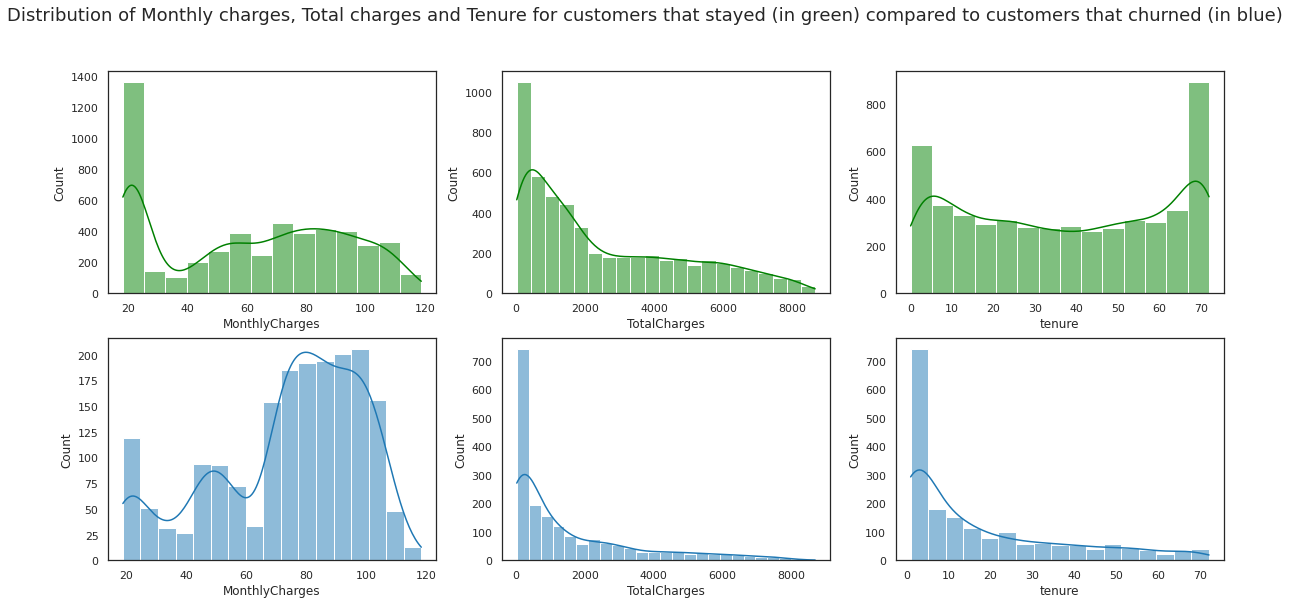

In [ ]:
dims = (20, 9)
sns.set_style("white")
fig, ax =plt.subplots(2,3,figsize=dims) # defining the dimensions of the array for the charts
plt.suptitle('Distribution of Monthly charges, Total charges and Tenure for customers that stayed (in green) compared to customers that churned (in blue) ', fontsize =18)

#customers that churned
sns.histplot(churn_yes.MonthlyCharges, ax=ax[1, 0], kde=True);
sns.histplot(churn_yes.TotalCharges, ax=ax[1, 1], kde=True);
sns.histplot(churn_yes.tenure, ax=ax[1,2], kde=True);

#customers that stayed
sns.histplot(churn_no.MonthlyCharges, ax=ax[0, 0],kde=True, color = 'green');
sns.histplot(churn_no.TotalCharges, ax=ax[0, 1], kde=True, color = 'green');
sns.histplot(churn_no.tenure, ax=ax[0,2], kde=True, color = 'green');


**Observations**

We can see thta most of the customers that chrned had been with the company for 6 months or less and most were paying a high monthly charge. The total charges would understandibly higher with time as they represent the cummulative amount paid by the customers over the course of their contract with the company

##Analyze categorical data and compare how values within each category measure up against the 26.5% overall churn rate of the company

###a. Prepare the data for analysis and testing

In [ ]:
#Create a new dataframe with the set of columns that need to be analyzed for Churn, excludes columns that would be analyzed in the next phase
temp_df = telcochurn_df[telcochurn_df.columns.difference(['Customer Status','Churn Category','Churn Reason', 'Satisfaction Score'])]

In [ ]:
#Check
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Churn              7043 non-null   object 
 1   Churn Value        7043 non-null   int64  
 2   Contract           7043 non-null   object 
 3   Count              7043 non-null   int64  
 4   Dependents         7043 non-null   object 
 5   DeviceProtection   7043 non-null   object 
 6   InternetService    7043 non-null   object 
 7   MonthlyCharges     7043 non-null   float64
 8   MultipleLines      7043 non-null   object 
 9   OnlineBackup       7043 non-null   object 
 10  OnlineSecurity     7043 non-null   object 
 11  PaperlessBilling   7043 non-null   object 
 12  Partner            7043 non-null   object 
 13  PaymentMethod      7043 non-null   object 
 14  PhoneService       7043 non-null   object 
 15  SenCitizen Values  7043 non-null   int64  
 16  SeniorCitizen      7043 

###b. Split the dataframes into numerical and categorical based on their datatypes

In [ ]:
#Split dataframes into numerical and categorical based on their datatypes 
num_data_cols = temp_df.select_dtypes(exclude=['object']).columns # numeric data columns
cat_data_cols = temp_df.select_dtypes(include=['object']).columns # categorical or qualitative data columns
cat_data_cols = cat_data_cols[cat_data_cols != 'Churn'] # excluding the column Churn containing Yes and No values

cat_data_cols
#num_data_cols

Index(['Contract', 'Dependents', 'DeviceProtection', 'InternetService',
       'MultipleLines', 'OnlineBackup', 'OnlineSecurity', 'PaperlessBilling',
       'Partner', 'PaymentMethod', 'PhoneService', 'SeniorCitizen',
       'StreamingMovies', 'StreamingTV', 'TechSupport', 'gender'],
      dtype='object')

###c. Analyze and visualize the data

We already know that the overall churn rate is 26.5%, we will now create visualizations to show how the churn rate for each category compares to the overall churn rate of the company. This will help in pinpointing the main problem areas that the company needs to focus on improving

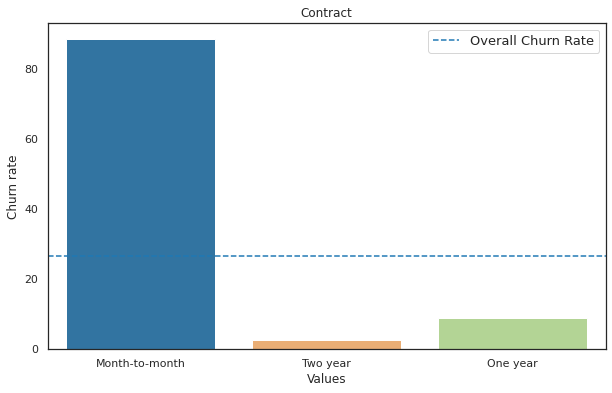

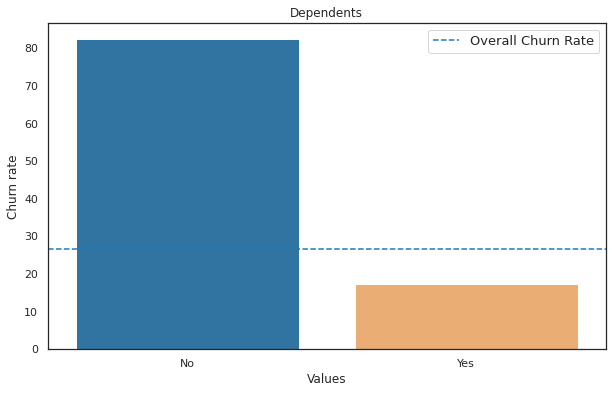

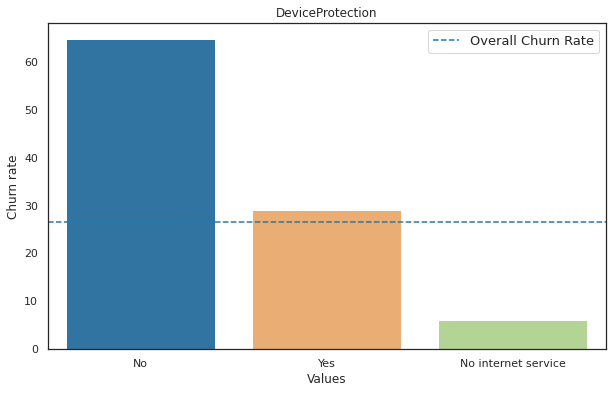

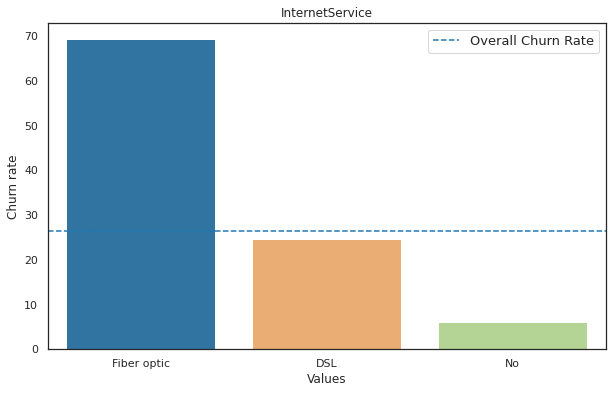

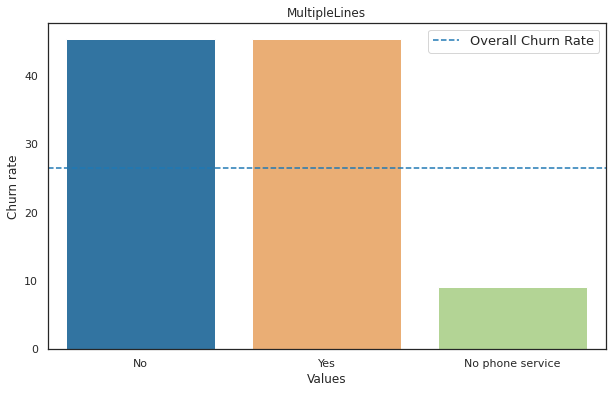

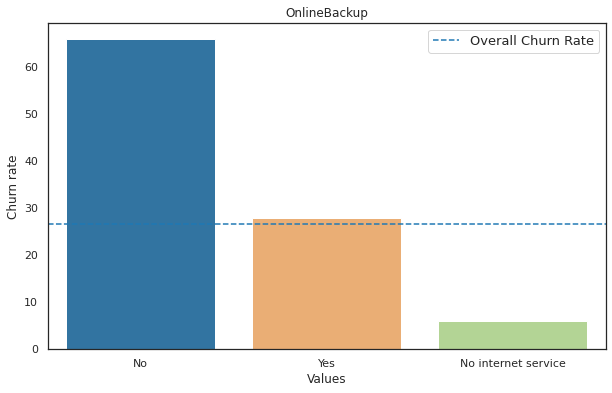

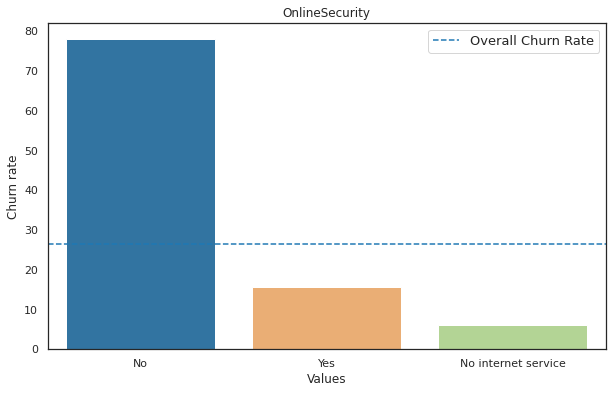

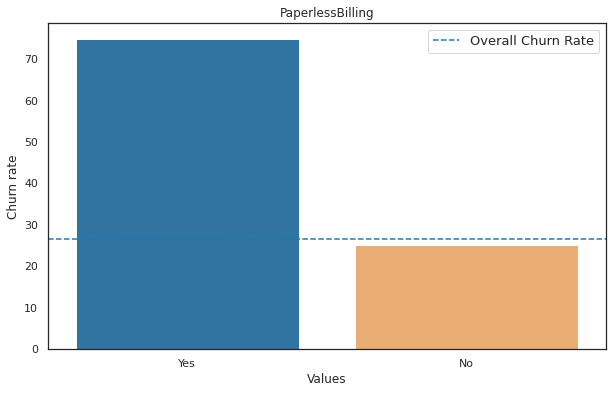

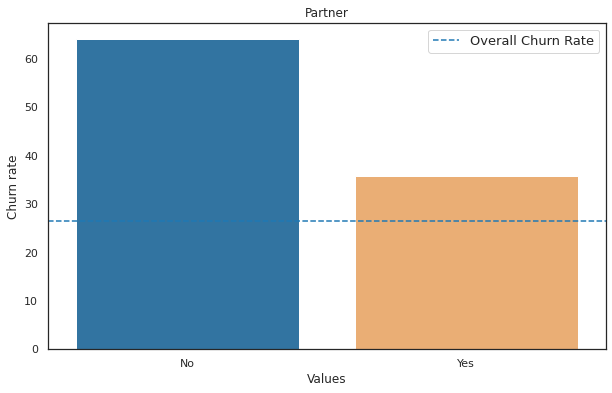

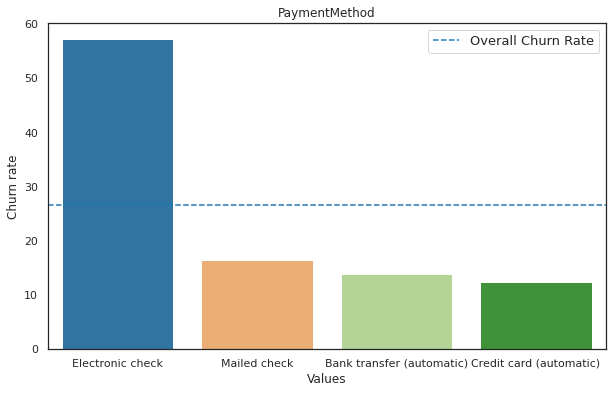

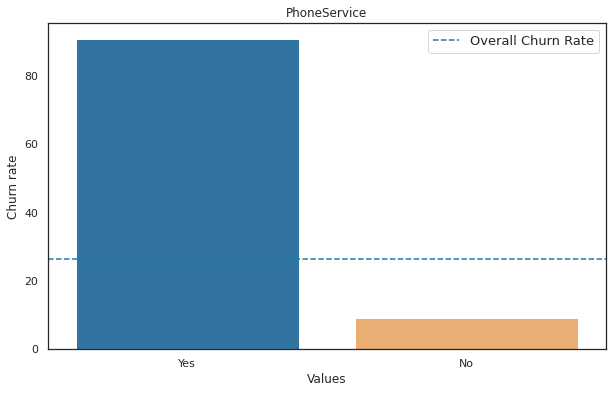

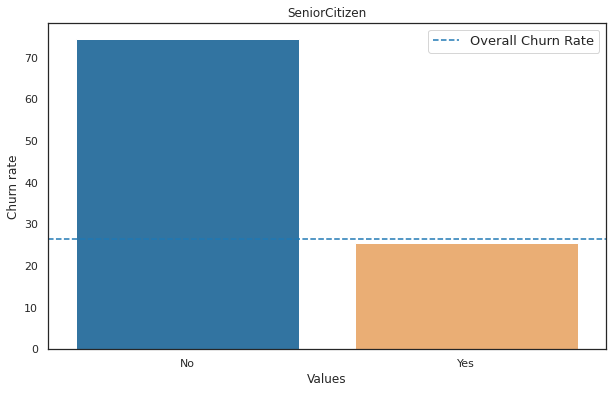

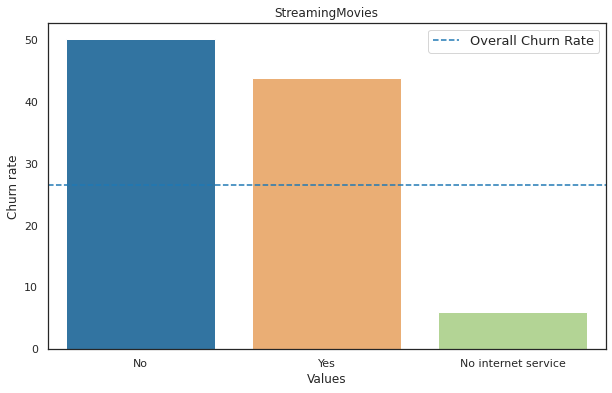

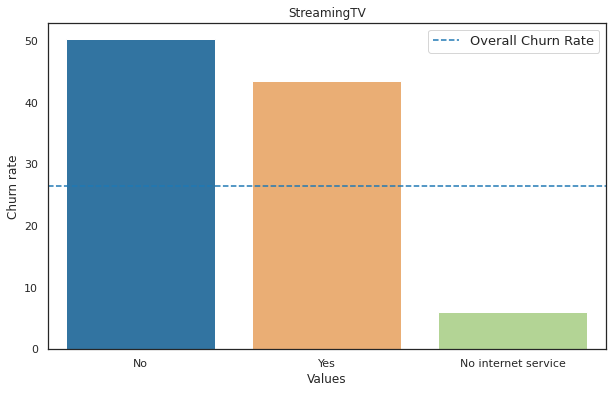

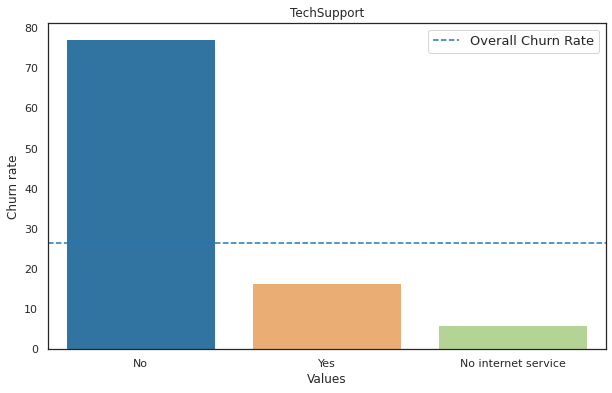

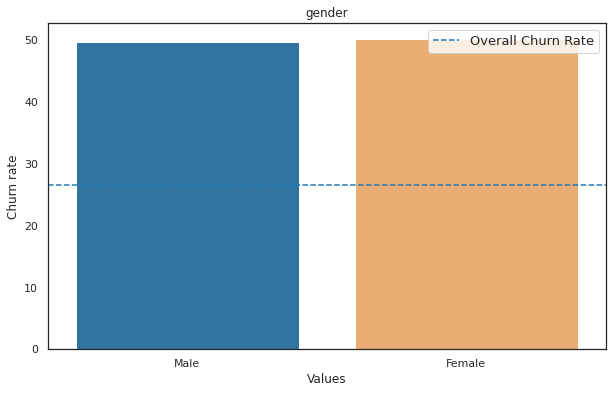

In [ ]:
#Using a for loop we calculate the churn rate value for each category and display the overallchurn rate 
#within each category for the purpose of comparison

for col in cat_data_cols:
    rates = []
    for x in temp_df[col].value_counts().index:
        no_churn = temp_df[temp_df.Churn == 'No'][col].value_counts()[x]
        churn = temp_df[temp_df.Churn == 'Yes'][col].value_counts()[x]
        total = no_churn+churn
        rate = churn/float(churnNB)
        rates.append(rate)
    rates = np.array(rates)*100
   

    plt.figure(figsize=(10, 6))
    plt.title(col)
    plt.axhline(churn_rate, ls='--' ,label='Overall Churn Rate')
    plt.legend()
    
    ax = sns.barplot(x=temp_df[col].value_counts().index, y=rates);
    ax.set(xlabel='Values', ylabel='Churn rate')
    ax.legend(loc='best', fontsize=13)
    plt.show()

###**d. Findings:**

**Demographics:**

Gender does not seem to be of relevance as both males and females churned at the same rate, approximately 50% each of the total customers that churned
64% of the customers that churned were single and 83% of the churned had no dependents

75% of the churned were individuals that do not classify as senior citizens. Though 25% of the churned customers were senior citizens but if we look at the overall population of senior citizens amongst the customers, we find that 42% of them churned, which is an interesting observation for our analysis as one of the hypotheses that we will intend to test assumes that senior citizens do not churn easily. 

**Services:**

91% of the churned customers had opted for a phone service, while the customers were equally divided into 45% each when we look at the churned population that either had or did not have multiple lines. 91% of the phone service users churning is an indicator that either the service is not good or the value that customers expect to derive from it based on what they are charged, is missing. In any case a red flag that needs deeper investigation on immediate basis.

89% of the customers that left the company had signed up for a month-to-month contract. Most of the customers who opt for monthly service do so to avoid having to stay with a service if they do not find it satisfactory, and can leave and join another service provider offering either better services or better rates. This particular segment called the *"Prepaid markets” or the “new” group* is usually the one deserving most attention as it shows the quality of customer acquisition, and a lot of marketing activity is focused on helping this group become loyal. 

Another interesting observation is regarding the internet service, 69% of the customers that churned had opted for a fiber optic connection for internet service, while 25% were using a DSL connection. The alarming rate of fiber optic users churning could be an indicator that the company needs to look into any service issues that might be causing customers to leave. Fiber optic is considered to be faster and far more reliable than DSL, so if a customer that particularly signed up for a fast and reliable service and does not receive it, is highly likely to churn.

It is highly likely that from the churned population, most of the 78% that enrolled for online security service would also have opted for online backup and device protection, which seems likely based on what we can observe from the visualizations, 66% and 65% of the churned customers were using online backup and device protection services.

Another interesting observation is that 77% of the customers that churned did not utilize the technical support service, we can assume that the reason for churn could have been technical difficulties and issues that they faced which they could not resolve. Whether technical support is available to all customers or not, is not clear from the data that has been provided and can be analyzed and investigated further to ensure that any churn that is a direct result of technical issues can be dealt with by the relevant teams.

Though 75% of the customers that churned had signed up for paperless billing and 57% were making the payments through electronic cheques but these factors are not really responsible for churn. How a customer pays and whether they want to go paperless or not is a decision that a customer makes on their own and has no bearing on the service. The only time these factors can become a cause of concern would be if the company was not offering them or if the customers were having problems with these services.

We will look into this further when we investigate the satisfaction scores and the churn categories that were provided by the customers.

*Ref: https://www.exacaster.com/wp-content/uploads/2014/02/Segmentation-for-Prepaid.-An-Overview-of-Common-Practices.pdf*


## Analyze the satisfaction scores rating the service

In [ ]:
#Display the values and counts for the Satisfaction score
telcochurn_df['Satisfaction Score'].value_counts()

3    2665
4    1789
5    1149
1     922
2     518
Name: Satisfaction Score, dtype: int64

In [ ]:
# Create a crosstab of customer count for Customer Churn and Satisfaction Score
pd.crosstab(telcochurn_df['Churn'],telcochurn_df['Satisfaction Score'])

Satisfaction Score,1,2,3,4,5
Churn,,,,,
No,0,0,2236,1789,1149
Yes,922,518,429,0,0


##Analyze the satisfaction score of the customers that churned based on churn category


In [ ]:
# Create a crosstab of customer count for churn category and satisfaction score
pd.crosstab(telcochurn_df['Churn Category'],telcochurn_df['Satisfaction Score']) #sorting needed bar chart OR scatter plot or lines


Satisfaction Score,1,2,3
Churn Category,,,
Attitude,92,117,105
Competitor,525,172,144
Dissatisfaction,154,83,66
Other,64,71,65
Price,87,75,49


**a. Treemap of Churn Categories**

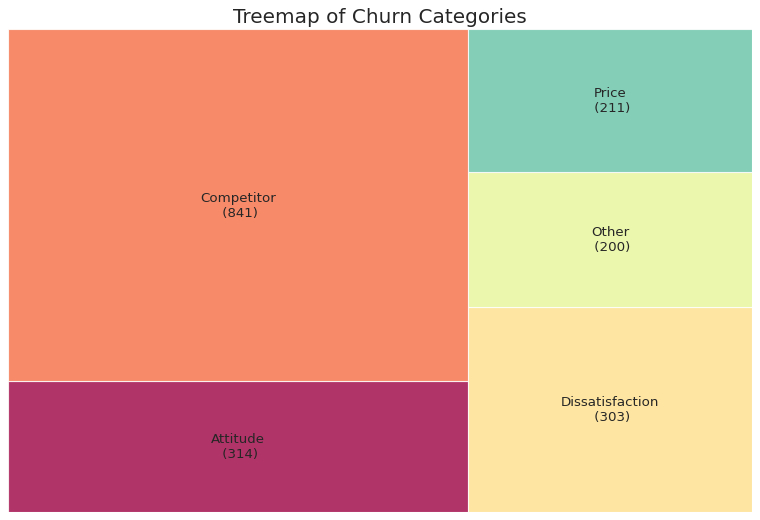

In [ ]:
# Treemap of churn categories

!pip install squarify
import squarify 

# Prepare Data
df = telcochurn_df.groupby('Churn Category').size().reset_index(name='counts')
labels = df.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = df['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8);

# Decorate
plt.title('Treemap of Churn Categories', fontsize = 18);
plt.axis('off')
plt.show();

##Analyze the satisfaction score of the customers that churned and the reasons for churning


In [ ]:
# Create a crosstab of customer count for Churn Reason and Satisfaction Score
pd.crosstab(telcochurn_df['Churn Reason'],telcochurn_df['Satisfaction Score']) #sorting needed bar chart OR scatter plot or lines

Satisfaction Score,1,2,3
Churn Reason,,,
Attitude of service provider,25,34,35
Attitude of support person,67,83,70
Competitor had better devices,302,11,0
Competitor made better offer,131,93,87
Competitor offered higher download speeds,46,33,21
Competitor offered more data,46,35,36
Deceased,2,2,2
Don't know,51,52,27
Extra data charges,16,14,9


**Findings**

As a result of our analysis above, we can draw the following conclusions:
- 841 (45%) of the customers churned due to competition. The main contributing factors were:
  - Better devices or deals offered
  - More data and higher download speeds
- 357 (19%) of customers churned as a result of customer service related issues. These included the attitude of the service provider or support staff, lack of knowledge and expertise of the customer service support (css) staff available through phone or internet
- 278 (15%) left as a result of dissatisfaction with one or the other form of services available or lack thereof.
- 211 (11%) churned due to price issues involving the service, or extra data and long distance call charges
- 182 (10%) of the customers did not list a reason, moved or were deceased.

#Hypotheses Testing

##First t-test

**a. Hypothesis:**

H₀: µ₁ - µ₂ = 0 

Hₐ: µ₁ - µ₂ ≠ 0
 
H₀: There is no difference in the length of service tenure of customers that churned  compared to customers that stayed

Hₐ: There is a difference in the length of service tenure of customers that churned  compared to customers that stayed

**b. Run the two sample t-test**

In [ ]:
#Run two sample t-test on tenure and churn status
stats.ttest_ind(churn_yes['tenure'], churn_no['tenure'])

Ttest_indResult(statistic=-31.57955051135377, pvalue=7.99905796059022e-205)

**c. Result**

With 95% confidence we can state that there is a statistically significant difference in the tenure of the customers that churned compared to those that stayed with the company, the null hypothesis is rejected. 

In [ ]:
# Calculate marginal error and confidence intervals (lower and upperbounds) for tenure for both customers that churned and those that stayed

sc1a = churn_yes['tenure'].mean()
sc2a = churn_no['tenure'].mean()
diff_in_mean1 = sc1a - sc2a

from scipy.stats import sem
marg_err_yes1 = sem(churn_yes['tenure'])/math.sqrt(len(churn_yes['tenure'].index))*1.96
CI_low = churn_yes['tenure'].mean()- marg_err_yes1
CI_up= churn_yes['tenure'].mean()+ marg_err_yes1

marg_err_no1 = sem(churn_no['tenure'])/math.sqrt(len(churn_no['tenure'].index))*1.96
CI_low2 = churn_no['tenure'].mean()- marg_err_no1
CI_up2 = churn_no['tenure'].mean()+ marg_err_no1

diffCI_lowa = CI_low - CI_low2
diffCI_upa = CI_up - CI_up2

diff_in_mean1

diffCI_lowa
diffCI_upa

-19.57948462020185

**d. Visualization**

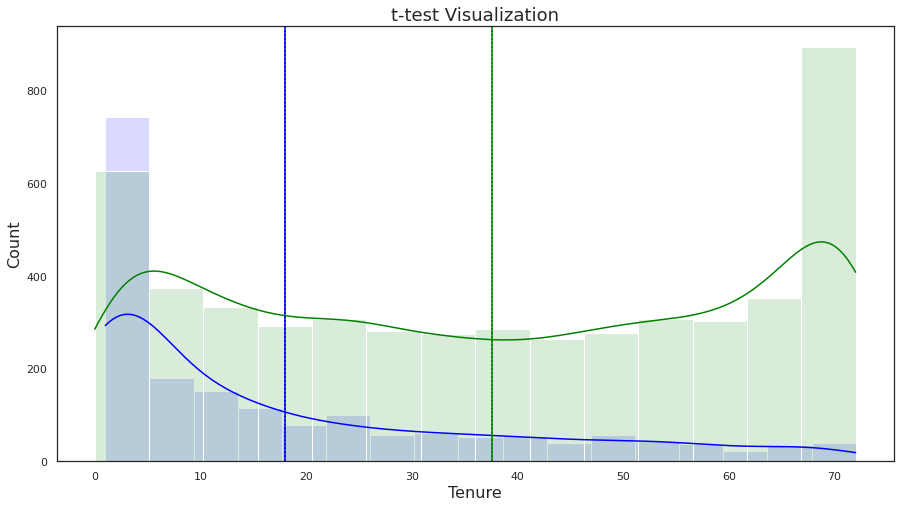

In [ ]:
# Make a histogram to visualize difference in the means of tenure where customers churned and where they stayed
#Blue represents the churned data and green for tenure of customers that stayed
plt.figure(figsize=(15, 8))
plt.title('t-test Visualization', fontsize = 18);
plt.ylabel("Count", fontsize = 16)
plt.xlabel("Tenure", fontsize = 16);
sns.histplot(churn_yes['tenure'], kde=True, color='blue', alpha=0.15)
plt.axvline(churn_yes['tenure'].mean(), color='blue')
plt.axvline(CI_low, color='blue', linestyle=':')
plt.axvline(CI_up, color='blue', linestyle=':')
sns.histplot(churn_no['tenure'], kde=True, color='green', alpha=0.15)
plt.axvline(churn_no['tenure'].mean(), color='green')
plt.axvline(CI_low2, color='green', linestyle=':')
plt.axvline(CI_up2, color='green', linestyle=':')
ax.legend(loc='best', fontsize=13)
plt.show();

Here the visualization clearly shows that the means of the tenure of the customers that churned and those that did not are significantly far apart at 95% CI, therefore we reject the null hypothesis

##Second t-test


**a. Hypothesis:**

H₀: µ₁ - µ₂ = 0 

Hₐ: µ₁ - µ₂ ≠ 0
 
H₀: Senior citizens do not stay with a service provider for a longer tenure compared to other age groups

Hₐ: Senior citizens tend to stay with a service provider for a longer tenure compared to other age groups


In [ ]:
# Split the data for 2nd t-test and for the z-test - create 2 data frames for customers that are senior citizen = sencit_y and the ones that are not = sencit_n
sencit_y = telcochurn_df.loc[telcochurn_df['SeniorCitizen'] == 'Yes']# loc
sencit_n = telcochurn_df.loc[telcochurn_df['SeniorCitizen'] == 'No']

**b. Run the two sample t-test**

In [ ]:
# run two sample t-test
stats.ttest_ind(sencit_y['tenure'], sencit_n['tenure'])

Ttest_indResult(statistic=1.3903285616763954, pvalue=0.16447307399526231)

**c. Result**

With 95% confidence we can state that there is a statistically insignificant difference in the means of the tenure of senior citizens compared to other age groups, therefor we fail to reject the  null hypothesis. 

In [ ]:
# Calculate marginal error and confidence intervals (lower and upperbounds)of tenure for both senior citizens and customers in other age brackets
sc1 = sencit_y['tenure'].mean()
sc2 = sencit_n['tenure'].mean()
diff_in_mean = sc1 - sc2

from scipy.stats import sem
marg_err_yes = sem(sencit_y['tenure'])/math.sqrt(len(sencit_y['tenure'].index))*1.96
CI_low3 = sencit_y['tenure'].mean()- marg_err_yes
CI_up3= sencit_y['tenure'].mean()+ marg_err_yes

marg_err_no = sem(sencit_n['tenure'])/math.sqrt(len(sencit_n['tenure'].index))*1.96
CI_low4 = sencit_n['tenure'].mean()- marg_err_no
CI_up4 = sencit_n['tenure'].mean()+ marg_err_no

Diff_CI_low = CI_low3 - CI_low4
Diff_CI_up = CI_up3 -CI_up4
 

Diff_CI_low
#Diff_CI_up

1.0704670265920413

**d. Visualization**

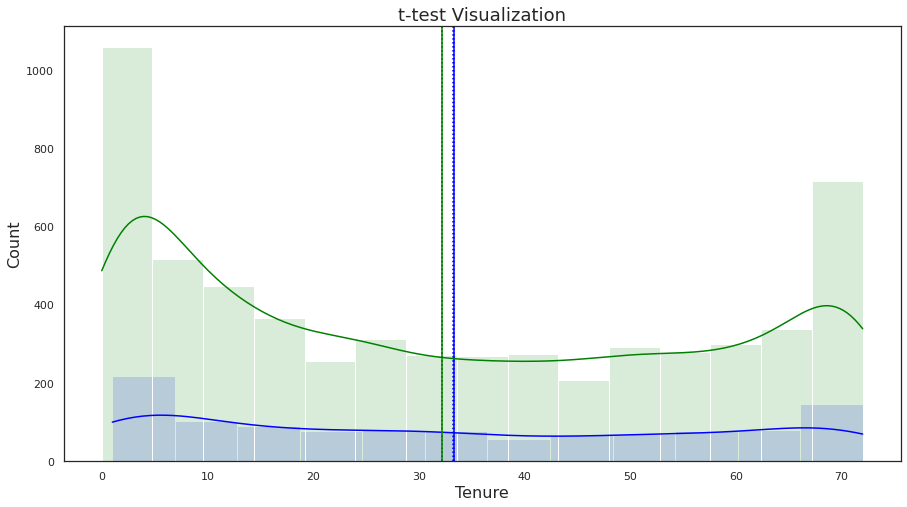

In [ ]:
# Make a histogram to visualize difference in the means of tenure of senior citizens compared to customers of other ages 
#Blue represents the churned data and green for tenure of customers that stayed
plt.figure(figsize=(15, 8))
plt.title('t-test Visualization', fontsize = 18);
plt.ylabel("Count", fontsize = 16)
plt.xlabel("Tenure", fontsize = 16);
sns.histplot(sencit_y['tenure'], kde=True, color='blue', alpha=0.15)
plt.axvline(sencit_y['tenure'].mean(), color='blue')
plt.axvline(CI_low3, color='blue', linestyle=':')
plt.axvline(CI_up3, color='blue', linestyle=':')
sns.histplot(sencit_n['tenure'], kde=True, color='green', alpha=0.15)
plt.axvline(sencit_n['tenure'].mean(), color='green')
plt.axvline(CI_low4, color='green', linestyle=':')
plt.axvline(CI_up4, color='green', linestyle=':')
plt.show();

The visualization proves the result of our t-test, as we can see that the difference between the means of tenures of senior citizens and the customers in the younger age bracket is insignificant at 95% CI, so we fail to reject the null hypothesis

# z-test



## First z-test

**a. Hypothesis:**

H₀: µ₁ - µ₂ = 0

Hₐ: µ₁ - µ₂ ≠ 0

H₀: There is no difference in the churn rate of customers on a month-to-month contract versus those on a long-term contract

Hₐ:There is a difference in the churn rate of customers on a month-to-month contract versus those on a long-term contract

In [ ]:
# Split the data for the 2nd z-test - creates 2 data frames based on the contract period
monthly_contracts = telcochurn_df.loc[telcochurn_df['Contract'] == 'Month-to-month']
long_term = telcochurn_df.loc[telcochurn_df['Contract'] != 'Month-to-month']

**b. Run z-test**

In [ ]:
# run z-test
from statsmodels.stats.weightstats import ztest #import the correct module to conduct the test

ztest(monthly_contracts['Churn Value'], long_term['Churn Value'])

(37.17984261635385, 1.4449422955189606e-302)

**c. Result**

With 95% confidence we can state that there is a statistically significant difference in the churn rates of the customers that are on a month to month contract compared to those that are on a long term contract, the null hypothesis is rejected. 

**d. Visualization**

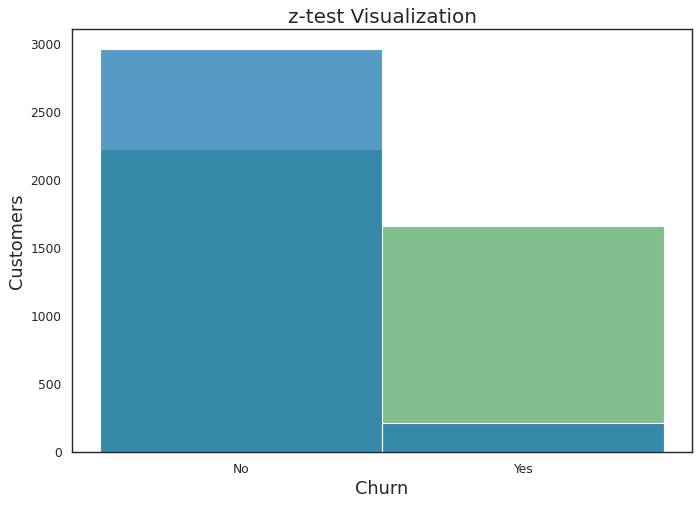

In [ ]:
#Visualize the z-test
plt.figure(figsize=(10,7), dpi= 80)
plt.title('z-test Visualization', fontsize = 18);
plt.xlabel("Churn", fontsize = 16)
plt.ylabel("Customers", fontsize = 16)
sns.histplot(monthly_contracts.Churn, color ='g');
sns.histplot(long_term.Churn);

Our visualization clearly shows the result of our z-test, showing that there is a statistically significant difference in the churn rates of the customers that are on a month to month contract (in green) compared to those that are on a long term contract (in blue), therefore the null hypothesis is rejected

##Second z-test

**a. Hypothesis:**

H₀: µ₁ - µ₂ = 0 

Hₐ: µ₁ - µ₂ ≠ 0
 
H₀: Senior citizens are less likely to churn easily from their service providers

Hₐ: Senior citizens churn easily from their service providers

**b. Run z-test**

In [ ]:
# run z-test on senior citizen and churn values
from statsmodels.stats.weightstats import ztest #import the correct module to conduct the test

ztest(sencit_y['Churn Value'], sencit_n['Churn Value'])

(12.807865726034748, 1.481536273445132e-37)

**c. Result**

With 95% confidence we can state that there senior citizens are equally likely or in this case, more likely to churn compared to individuals that are younger, the null hypothesis is rejected. 

**d. Visualization**

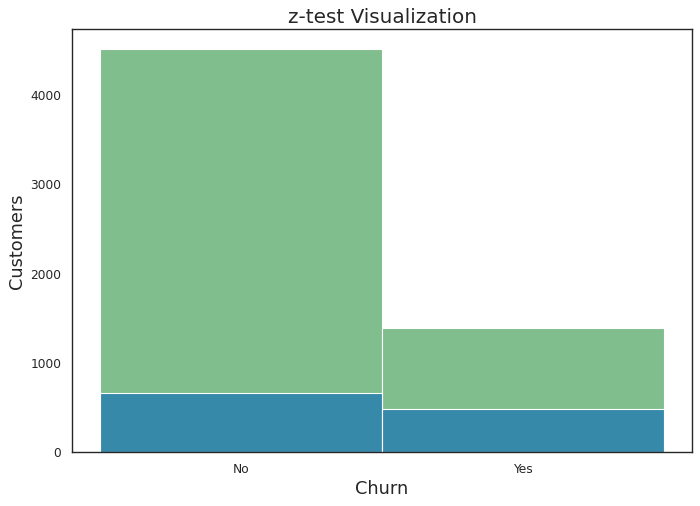

In [ ]:
#Visualize the z-test
plt.figure(figsize=(10,7), dpi= 80)
sns.histplot(sencit_n.Churn, color='g');
sns.histplot(sencit_y.Churn);
plt.title('z-test Visualization', fontsize = 18);
plt.xlabel("Churn", fontsize = 16)
plt.ylabel("Customers", fontsize = 16);

In this visualization of our z-test, we can see that though the younger customers(in green) might be churning more in terms of the overall customers churned, around 75%, but when compared to the population of the senior citizens (in blue) we can see that the churn numbers for seniors is higher; overall around 40% of the seniors churned while only 20% of the younger population appears to have churned when compared to the total young population, rejecting our null hypothesis that the seniors churn at a slower rate compared to the younger population.

#**Summary**

* A little over 1/4 of the customers were lost due to churn - i.e., the company lost 1 out of 4 of its customers
* An average customer of the company is: young, without dependents, uses the phone services and prefers paperless billing. Senior citizens make for 25 percent of the churn population but in terms of the total senior population, over 40% of them churned
* While an average customer that churns is: young, single, without dependents, with fiber optics, without additional services, with month-to-month contract, prefers paperless billing, and pays by electronic check; 
* Company has a serious issue with customer retention and as mentioned in the dataset, this retention occured during the last month which makes it all the more necessary for an immediate action on the matter.

###**Profile of an average customer that churned based on some of the main factors that contribute to churn**



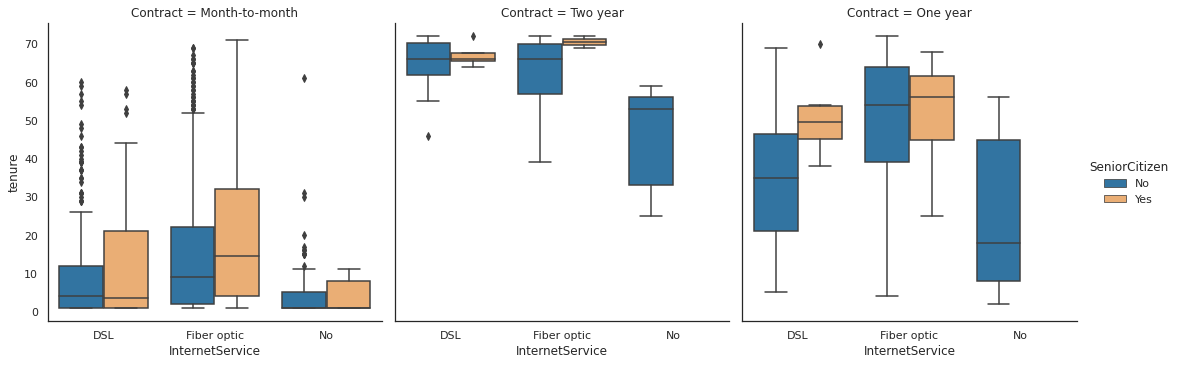

In [ ]:
# Customers that churned
sns.catplot(y = 'tenure', x="InternetService", hue="SeniorCitizen", col="Contract", kind="box", data=churn_yes);

###**Profile of an average customer that stayed, based on the same factors that were of importance to customers that churned**


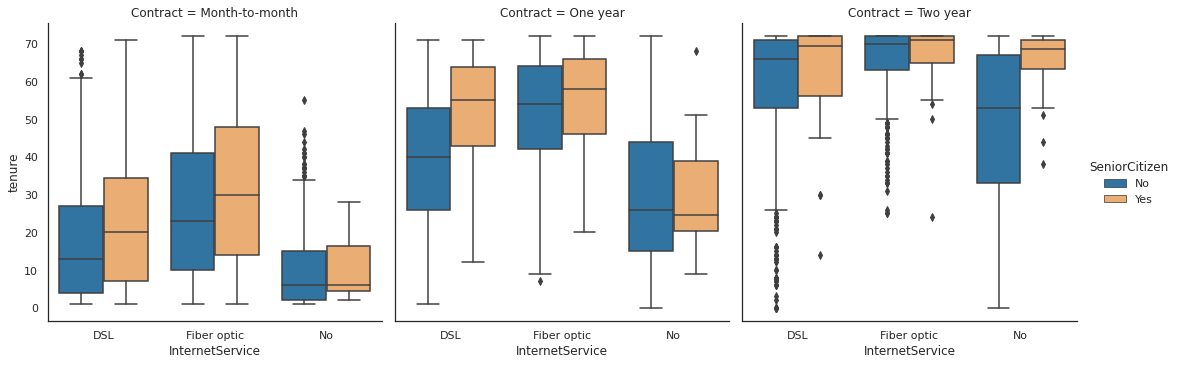

In [ ]:
# Customers that stayed 
sns.catplot(y="tenure", x="InternetService", hue="SeniorCitizen", col="Contract", kind="box", data=churn_no);

###**Profile of an average customer irrespective of the churn**

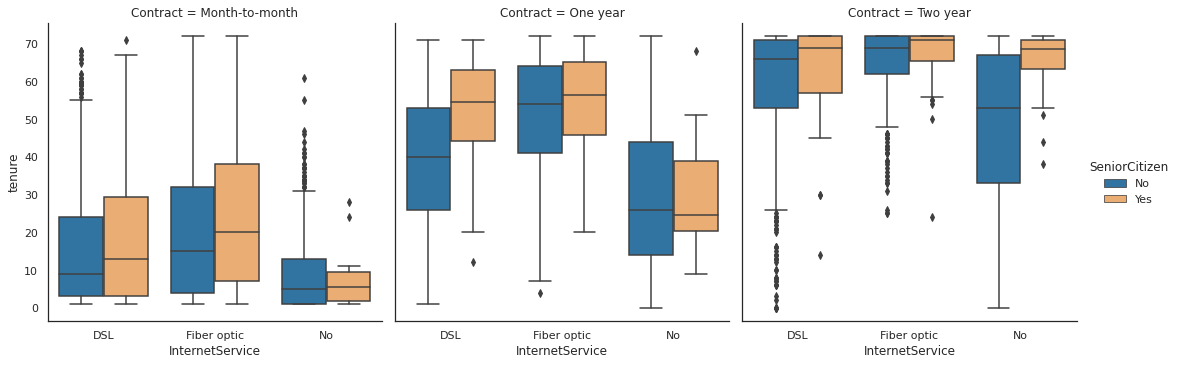

In [ ]:
# Total Customers 
sns.catplot(y="tenure", x="InternetService", hue="SeniorCitizen", col="Contract", kind="box", data=telcochurn_df);

#**Final Conclusion & Recommendations:**

The annual churn rates for the telecommunications companies on an average can range from anywhere between 10 percent to 67 percent. Wireless companies today measure voluntary churn by a monthly figure, such as 1.9 percent or 2.1 percent. This is the average number of customers who quit their service per month. 

If we go with the industry average of monthly churn, the 26.5 percent churn that occured within a month is a signal that there are serious problens in the company.

It is a seriously alarming situation and requires immediate attention and action.
It is recommended that we investigate the possible reasons for this high rate of churn in the past month. What unusual circumstances occured that led to this outflow of customers. 

Roughly 75 percent of the 17 to 20 million subscribers signing up with a new wireless carrier every year, are coming from another wireless provider and hence are already churners.
These more than likely would be the customers that sign up for month-to-month contracts or what we can call the “Prepaid Market”; 55 percent of our total customers fall in this category and 89 percent of the customers that churned also belonged to this category, 41 percent of which had only been with the company for 6 months or less, and 20 percent had only been with the company for a month.

The reasons for this high rate can be anything from dissatisfactory service, customer signing up for a trial period, accounts that expired automatically as the customer did not top-up within the specified period etc. 

Once the reasons are identified, measures can be taken to avoid them, for instance the customer can be given the option to top-op automatically, through bank transfer or credit card so their account does not terminate automatically.
New deals can be designed for the Prepaid Market offering better data speeds and limits.

Telecommunications companies spend hundreds of dollars to acquire a new customer, so when a customer leaves, companies lose not only the future revenue from that customer but also the resources that were spent in acquiring the customer in the first place.

91 percent of the churned customers had signed up for the phone service, this again raises questions regarding the quality of the service being provided. 
It is recommended that the company assess its network and service reliability to ensure that customers who use the service do not face any issues. If needed, an investment can be made in the infrastructure to ensure a better quality of service is available for the customers.

Industry retention surveys have shown that while price and product are important, most people leave any service because of dissatisfaction with the way they are treated. They would not be looking around if they were happy with their current provider, its service and employees. 

Our analysis shows that 19 percent of the customers left due to customer-service related issues, which could have been avoided. It is recommended that greater stress be paid to the training of the CSS, not only about how they should deal with the customers, but also train them and keep them updated on the products and services being offered. This is recommended as the CS staff are the ones that directly deal with the customers and are in a position to influence them into not just staying with the company but also in selling them the other services/products that the company offers.

The importance of retaining a customer cannot be overestimated, studies prove that loyal customers are more likely to buy opt for supplementary services / products and are also more likely to refer others. Plus, keeping customers costs less than continually acquiring new ones.
 In fact, studies by Bain & Company, along with Earl Sasser of the Harvard Business School, have shown that even a 5 percent increase in customer retention can lead to an increase in profits of between 25 and 95 percent.


Companies that focus more on new customer acquisition can still grow. But the cost of acquiring new customers is high. So, if we want to recoup all of the marketing investment it takes to get those new customers, then we need to ensure that they need to stick around and become repeat customers.

There are a few different strategies that can be employed.

In order to improve the retention rates, it is recommended that we regularly measure our retention to stay up to date regarding factors that are of most significance to our loyal customers, these would be customers that have been with us for over 12 months, and make those areas a priority for improvement.
For instance, our loyal customers might be more likely to care about customer service, while one-time customers could be more focused on prices.

We can also learn a lot about what we need to improve upon by asking the customers we failed to retain. This can be done by sending out targeted emails or surveys to get feedback from the customers on why they chose to leave. In our case, we can derive this insight from the data available to us in the Satisfaction score, Churn Categories and Churn Reason features.

Around 45 percent of the customers that churned, left because they were offered better service, devices or deals from the competitors.

In order to improve our offering and making the terms more lucrative for the customers, it is imperative that the company stays well-informed with the ever changing and dynamic market to ensure that it keeps updating its services in line with the demands of the customers.
It is recommended to conduct a detailed SWOT (strength, weaknesses, opportunities and threats), and to further investigate and research on what the competition is offering. Once we have the relevant data we can work on devising plans and deals that allow customers to stay with the company for a longer tenure. 

Another issue which is of extreme importance for every industry is that of customer-service. If the customer does not like the attitude of the staff they deal with, it is highly unlikely that they will stick with the company, and with the social media being so easily accessible, they can easily post it on one of the many networking sites out there. This could result in a dominos effect with more customers leaving due to the perceived injustice they feel the other customer had faced.

Our data shows that 19 percent of the customers left due to customer-service related issues, which could have been avoided. It is recommended that greater stress be paid to the training of the CSS not only about how they should deal with the customers, but also train them and keep them updated on the products and services being offered. This is recommended as the CS staff are the ones that directly deal with the customers and are in a position to influence them into not just staying with the company but also in selling them the other services/products that the company offers.

The rate of attrition in the senior population also demands attention, although they make 25 percent of the total churned population but if we only take into account the senior population, we can see that 42 percent of them churned, as was clearly visible in the visualization of our z-test.

Another service issue that our analysis highlights is that of the fiber optic service. Nearly 70 percent of the customers leaving had signed up for fiber optic internet service. Fiber optic should be more reliable and faster than the DSL service, the churn rate for DSL is 24 percent. So, Internet Service is another area that needs to be further investigated and improved.

Overall, it’s important to focus on keeping our customers happy. We should focus on offering the best possible service at reasonable prices, and simplest shopping experience for them. But by focusing on the areas that are most important to our loyal customers, we can see a big return on your investment in the long run.

In the end, the suggestions for improvement provided here have been based on the insights gaines from the results of our analyses and tests. It is recommended to further conduct an in-depth study on preferably a larger dataset to determine what are the reason that are contributing to this outflux of customers.

From this data the analysts can identify even more trends and patterns, visualize previously unknown variable relationships, draw valuable conclusions regarding customer experiences, and drill down to the root cause of churn for each individual customer, which will lead to better, proactive, data-driven business decisions, a more satisfied customer base, and a reduced churn rate.
Harnessing the power and realizing the full potential of big data analytics for customer churn analysis is the key to reducing customer churn rates in telecom.

 A combination of accelerated insights, data accessibility, location intelligence etc. would enable us to instantly access, visualize, analyze, and interact with customer data. 
 
As a next step, it is recommended to design a predictive model, that takes into account the profile of the customers that can be drawn from these analyses to allow the company to predict and identify the customers that are most likely to churn, so the company can focus on trying to retain them before they churn.



References: 
- https://www.dbmarketing.com/telecom/churnreduction.html#:~:text=Annual%20churn%20rates%20for%20telecommunications%20companies%20average%20between,of%20dissatisfaction%20with%20the%20way%20they%20are%20treated.

- https://hbswk.hbs.edu/archive/the-economics-of-e-loyalty

- https://media.bain.com/Images/Value_online_customer_loyalty_you_capture.pdf
